## Lab 5.1 Assignment: Producing Publication-Ready Figures

Rerunning the following commmands  to modify the 'titanic' dataset.

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

lab3_data = sns.load_dataset('titanic')
lab3_data.loc[(lab3_data['who'] == 'child') & (lab3_data['sex'] == 'male'), 'who'] = 'boy'
lab3_data.loc[(lab3_data['who'] == 'child') & (lab3_data['sex'] == 'female'), 'who'] = 'girl'
lab3_data.loc[lab3_data['survived'] == 0, 'survived_str'] = 'no'
lab3_data.loc[lab3_data['survived'] == 1,  'survived_str'] = 'yes'

Setting the style of the plots  to 'white' and the context to 'paper':

In [ ]:
sns.set_style("white")
sns.set_context("paper")

 Maintaininf a consistant color-scheme by saving the following Python dictionary under a name:

In [ ]:
color_scheme = {'man':'blue','woman':'tab:orange','boy':'cornflowerblue','girl':'sandybrown'}

# Plot #1

Remaking ther bar plot with the new color scheme:

<Axes: xlabel='class', ylabel='survived'>

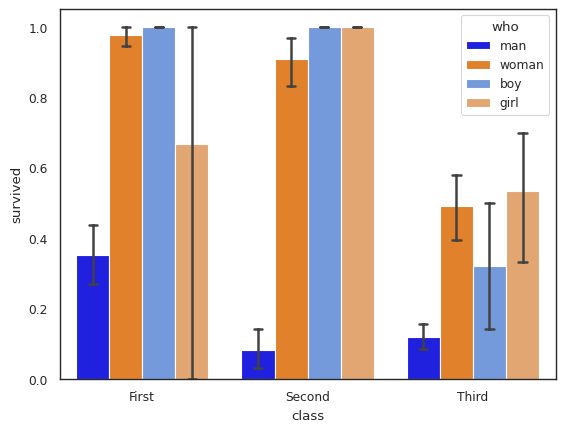

In [ ]:
sns.barplot(data=lab3_data, x="class", y='survived',  hue='who', palette = color_scheme,capsize = 0.2)

Remove the 'Second' class category by using a custom x-axis order:

<Axes: xlabel='class', ylabel='survived'>

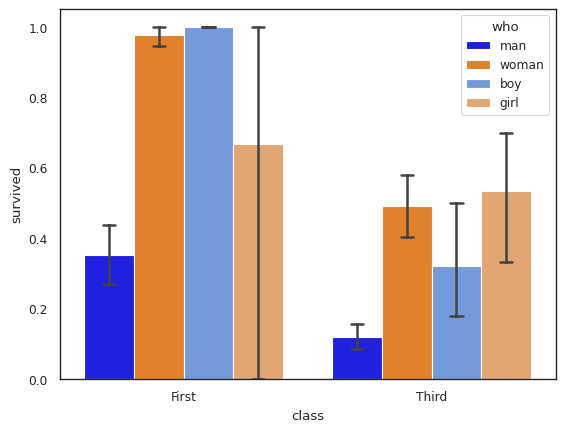

In [ ]:
sns.barplot(data=lab3_data, x="class", y='survived',  hue='who', palette = color_scheme, order = ['First', 'Third'],capsize = 0.2)

Setting the plot's xlabel to 'Boarding Class' and ylabel to 'Mean survival 'rate'and then despine the plot:

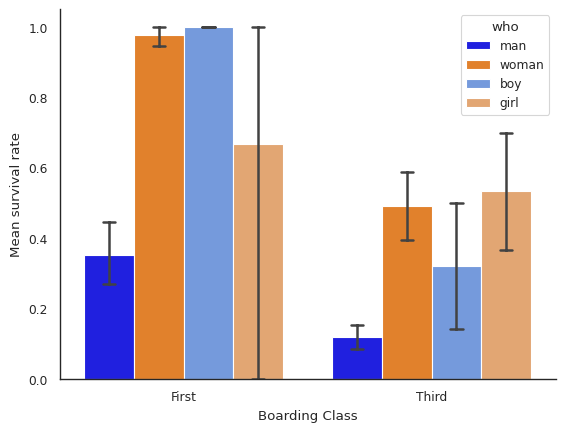

In [ ]:
axes = sns.barplot(data=lab3_data, x="class", y='survived',  hue='who', palette = color_scheme, order = ['First', 'Third'], capsize = 0.2)
axes.set(xlabel='Boarding Class', ylabel='Mean survival rate')
sns.despine()

# Plot #2

Produce a colorless version of the previous boxplot:

<Axes: xlabel='survived_str', ylabel='age'>

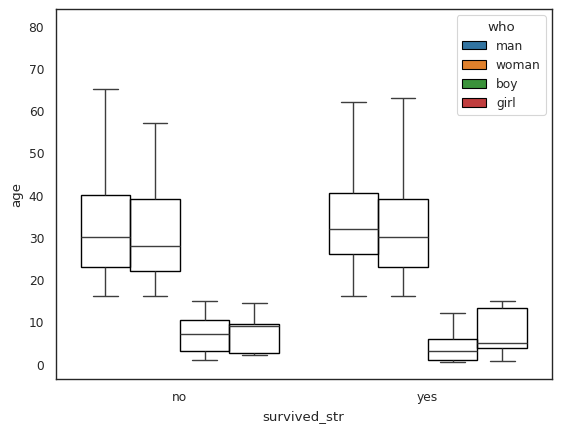

In [ ]:
sns.boxplot(data=lab3_data, x='survived_str', y='age', hue='who',fliersize=0, boxprops={'edgecolor':'black','facecolor':(1,1,1,0)})



Graph the old Strip Plot using the new color-scheme.

<Axes: xlabel='survived_str', ylabel='age'>

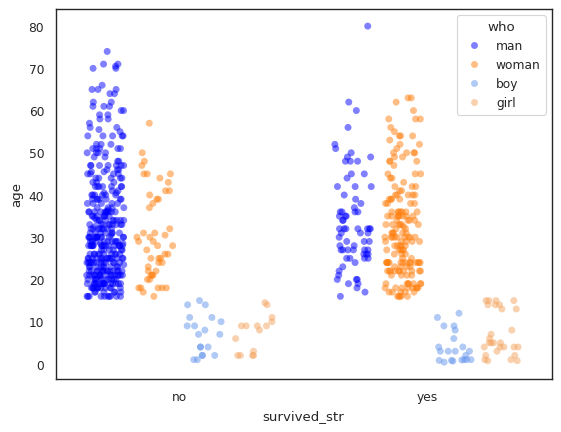

In [ ]:
sns.stripplot(data=lab3_data, x='survived_str', y='age', hue='who', jitter=0.3, alpha=0.5, dodge='true', palette = color_scheme)

Name both of these plots 'axes2':

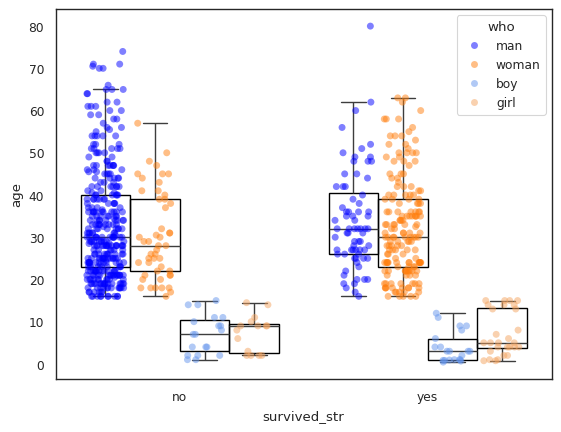

In [ ]:
axes2 = sns.boxplot(data=lab3_data, x='survived_str', y='age', hue='who',fliersize=0, boxprops={'edgecolor':'black','facecolor':(1,1,1,0)})
axes2 = sns.stripplot(data=lab3_data, x='survived_str', y='age', hue='who', jitter=0.3, alpha=0.5, dodge='true', palette = color_scheme)

handles, labels = axes2.get_legend_handles_labels()
plt.legend(handles[4:8], labels[4:8], title='who')

Finish the graph by performing the following:

 * Pass the zorder=0 argument to sns.stripplot.
 * Pass the zorder=5 argument to sns.boxplot.
 * Set the xlabel to 'Survived' and ylabel to 'Age'.
 * Add the command sns.despine().

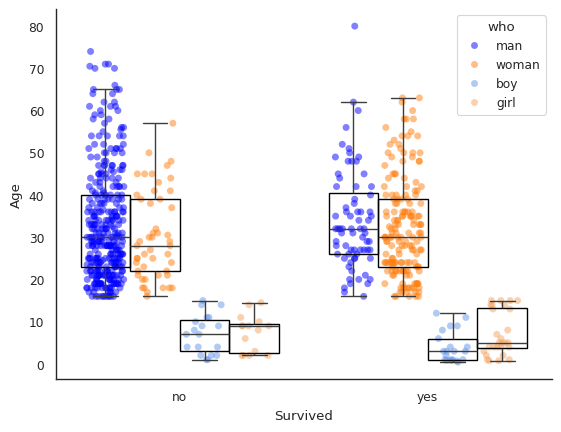

In [ ]:
axes2 = sns.boxplot(data=lab3_data, x='survived_str', y='age', hue='who',fliersize=0, boxprops={'edgecolor':'black','facecolor':(1,1,1,0)},  zorder=5 )
axes2 = sns.stripplot(data=lab3_data, x='survived_str', y='age', hue='who', jitter=0.3, alpha=0.5, dodge='true', palette = color_scheme, zorder=0)

handles, labels = axes2.get_legend_handles_labels()
plt.legend(handles[4:8], labels[4:8], title='who')

axes2.set(xlabel='Survived', ylabel='Age')
sns.despine()

# Plot #3

The third plot to graph will be the violin plot representation of Plot #2. Its specifications are near-identical to Plot #2:

 * Color datapoints by the 'who' they represent demographically.
 * Set the xlabel to 'Survived' and ylabel to 'Age'.
 * Add the command sns.despine().

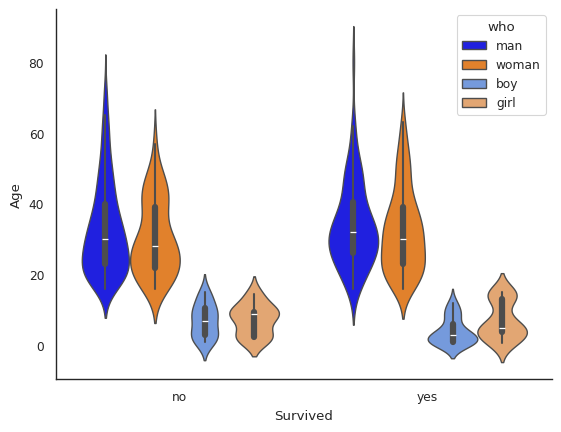

In [ ]:
axes3 = sns.violinplot(data=lab3_data, x='survived_str', y='age', hue = 'who', palette = color_scheme)
axes3.set(xlabel='Survived', ylabel='Age')
sns.despine()

# Plot #4

Make a scatter plot displaying 'age' vs. 'fare'.

The specifications for this graph are as follows:

 * Color datapoints by the 'class' of the individual.
 * Set the xlabel to 'Age' and ylabel to 'Fare'.
 * Despine the plot.

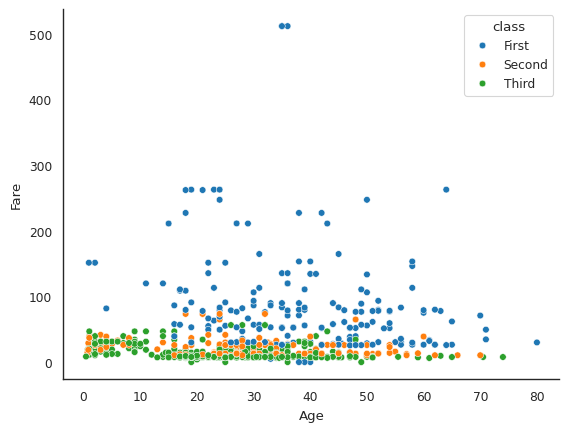

In [ ]:
axes4 = sns.scatterplot(data=lab3_data, x='age', y='fare', hue = 'class')
axes4.set(xlabel='Age', ylabel='Fare')
sns.despine()

# Plot #5

Use a heaplot:

In [ ]:
lab3_data_subset=lab3_data[['class','who','fare']]
lab3_data_subset=lab3_data_subset.dropna(how='any')
lab3_data_subsetAverage=lab3_data_subset.groupby(['class','who']).mean()
lab3_data_subsetAverage=lab3_data_subsetAverage.reset_index()
lab3_data_subsetAverage.head()

<ipython-input-47-29a8c999ea1d>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lab3_data_subsetAverage=lab3_data_subset.groupby(['class','who']).mean()


,class,who,fare
0,First,boy,117.802767
1,First,girl,160.962500
2,First,man,65.951086
3,First,woman,104.317995
4,Second,boy,27.306022


Convert this categorical data into matrix data as was shown in the tutorial.

In [ ]:
matrix_data = lab3_data.pivot_table(index='class', columns='who', values='fare')
matrix_data.head()

who,boy,girl,man,woman
class,,,,
First,117.802767,160.962500,65.951086,104.317995
Second,27.306022,29.240000,19.054124,20.868624
Third,27.716371,19.023753,11.340213,15.354351


[Text(0.5, 22.71666666666666, 'Demographic'),
 Text(49.91666666666667, 0.5, 'Boarding Class'),
 [Text(0.5, 0, 'boy'),
  Text(1.5, 0, 'girl'),
  Text(2.5, 0, 'man'),
  Text(3.5, 0, 'woman')]]

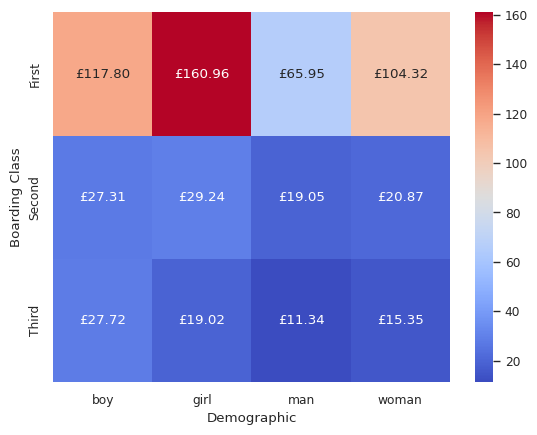

In [ ]:
axes5 = sns.heatmap(data=matrix_data, annot=True,fmt='.2f',cmap='coolwarm')
for text in axes5.texts: text.set_text('£' + text.get_text())
axes5.set(xlabel='Demographic', ylabel='Boarding Class', xticklabels=['boy','girl','man','woman'])